In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress import master_bar, progress_bar
%matplotlib inline

In [2]:
ls

createCsv.py      features/         index.ipynb       nikkei_index.csv


In [3]:
df = pd.read_csv('nikkei_index.csv')

In [4]:
df.head()

,date,opening,high,low,ending
0,2007-01-04 00:00:00,17322.50,17379.46,17315.75,17353.66
1,2007-01-05 00:00:00,17315.53,17327.13,17011.09,17091.58
2,2007-01-09 00:00:00,17018.89,17261.02,16983.97,17237.76
3,2007-01-10 00:00:00,17192.41,17199.41,16847.57,16942.40
4,2007-01-11 00:00:00,16958.57,17057.44,16758.46,16838.16


In [5]:
len(df)

2620

In [6]:
ntrain = 2600
ntest = 20

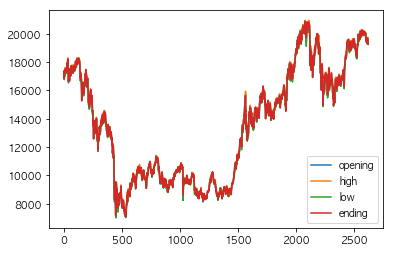

In [7]:
df.plot()

In [8]:
df['date'] = pd.to_datetime(df['date'])

from datetime import date, timedelta

base = df['date'][0]
date_time = []

for i in range(len(df)):
    date_time.append(base + timedelta(days = i))
    
df['date'] = date_time

In [9]:
df.head()

,date,opening,high,low,ending
0,2007-01-04,17322.50,17379.46,17315.75,17353.66
1,2007-01-05,17315.53,17327.13,17011.09,17091.58
2,2007-01-06,17018.89,17261.02,16983.97,17237.76
3,2007-01-07,17192.41,17199.41,16847.57,16942.40
4,2007-01-08,16958.57,17057.44,16758.46,16838.16


In [10]:
X = df[['date', 'ending']]
y = df['ending']

X_train = X[:ntrain]
y_train = y[:ntrain]
X_test = X[ntrain:].reset_index(drop=True)
y_test = y[ntrain:].reset_index(drop=True)

In [11]:
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train.drop(['date', 'ending'], axis=1, inplace=True)

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test.drop(['date', 'ending'], axis=1, inplace=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [12]:
X_valid = X_train[(ntrain - ntest):].reset_index(drop=True)
y_valid = y_train[(ntrain - ntest):].reset_index(drop=True)
X_train2 = X_train[:(ntrain - ntest)]
y_train2 = y_train[:(ntrain - ntest)]

In [13]:
X_train.head()

,year,month,day
0,2007,1,4
1,2007,1,5
2,2007,1,6
3,2007,1,7
4,2007,1,8


In [14]:
y_valid

0     20099.81
1     20118.86
2     19999.91
3     20020.86
4     20144.59
5     20099.75
6     19975.67
7     19955.20
8     20050.16
9     20079.64
10    19959.84
11    19925.18
12    19985.79
13    20080.04
14    20029.26
15    19952.33
16    20055.89
17    19996.01
18    19738.71
19    19729.74
Name: ending, dtype: float64

In [15]:
X_valid.head()

,year,month,day
0,2014,1,27
1,2014,1,28
2,2014,1,29
3,2014,1,30
4,2014,1,31


In [16]:
import lightgbm as lgb

lgbm_params = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'boosting_type' : 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
}

def lgbm_train(X_train_df, X_valid_df, y_train_df, y_valid_df, lgbm_params):
    lgb_train = lgb.Dataset(X_train_df, y_train_df)
    lgb_eval = lgb.Dataset(X_valid_df, y_valid_df, reference=lgb_train)

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)
    
    return model

In [17]:
model = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)

[1]	valid_0's rmse: 6140.29
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5842.13
[3]	valid_0's rmse: 5253.17
[4]	valid_0's rmse: 5013.22
[5]	valid_0's rmse: 4507.19
[6]	valid_0's rmse: 4314.16
[7]	valid_0's rmse: 3878.08
[8]	valid_0's rmse: 3715.19
[9]	valid_0's rmse: 3568.6
[10]	valid_0's rmse: 3207.13
[11]	valid_0's rmse: 3089.39
[12]	valid_0's rmse: 2951.52
[13]	valid_0's rmse: 2651.83
[14]	valid_0's rmse: 2540.18
[15]	valid_0's rmse: 2281.69
[16]	valid_0's rmse: 2191.29
[17]	valid_0's rmse: 1967.76
[18]	valid_0's rmse: 1915.2
[19]	valid_0's rmse: 1849.32
[20]	valid_0's rmse: 1821.13
[21]	valid_0's rmse: 1767.78
[22]	valid_0's rmse: 1586.74
[23]	valid_0's rmse: 1570.23
[24]	valid_0's rmse: 1409.03
[25]	valid_0's rmse: 1264.05
[26]	valid_0's rmse: 1232.61
[27]	valid_0's rmse: 1105.4
[28]	valid_0's rmse: 991.025
[29]	valid_0's rmse: 961.598
[30]	valid_0's rmse: 939.847
[31]	valid_0's rmse: 918.607
[32]	valid_0's rmse: 871.633
[33]	valid_0's rmse: 8

In [18]:
from sklearn.metrics import mean_absolute_error
import numpy as np
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
np.sqrt(mean_absolute_error(y_test, y_pred))

18.269915779046013

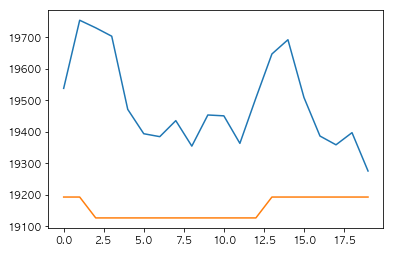

In [19]:
plt.plot(y_test)
plt.plot(y_pred)

In [20]:
X = df[['date', 'ending']]
y = df['ending']

X_train = X[:ntrain]
y_train = y[:ntrain]
X_test = X[ntrain:].reset_index(drop=True)
y_test = y[ntrain:].reset_index(drop=True)

In [21]:
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
# X_train.drop(['date', 'ending'], axis=1, inplace=True)

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test.drop(['ending'], axis=1, inplace=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [22]:
data = pd.concat([X_train, X_test]).reset_index(drop=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
data.head()

,date,day,ending,month,year
0,2007-01-04,4,17353.66,1,2007
1,2007-01-05,5,17091.58,1,2007
2,2007-01-06,6,17237.76,1,2007
3,2007-01-07,7,16942.40,1,2007
4,2007-01-08,8,16838.16,1,2007


In [24]:
data.tail()

,date,day,ending,month,year
2615,2014-03-03,3,NaN,3,2014
2616,2014-03-04,4,NaN,3,2014
2617,2014-03-05,5,NaN,3,2014
2618,2014-03-06,6,NaN,3,2014
2619,2014-03-07,7,NaN,3,2014


## day feature

In [25]:
for d in range(ntest):
    for lag in range(1, 3):
        feat_name = 'day_lag'+ str(lag) + '_day' + str(d)
        df = pd.DataFrame({
            'date': data['date'] + pd.DateOffset(lag+d),
            'ending_' + feat_name: data['ending']
        })
        df = pd.merge(data, df, on=['date'], how='left')
        train = pd.DataFrame(df['ending_' + feat_name])[:ntrain]
        test = pd.DataFrame(df['ending_' + feat_name])[ntrain:].reset_index(drop=True)
        train.to_feather(f'features/{feat_name}_train.feather')
        test.to_feather(f'features/{feat_name}_test.feather')

## week feature

In [26]:
for d in range(ntest):
    for lag in range(1, 3):
        feat_name = 'mean_week_lag'+ str(lag) + '_day' + str(d)
        sel = pd.Series(range(1, 8)) + (lag - 1) * 7 + d
        df = []
        for i in sel:
            tmp = pd.DataFrame({
                'date': data['date'] + pd.DateOffset(i),
                'ending_' + feat_name: data['ending']
            })
            df.append(tmp)
        df = pd.concat(df)
        df = df.groupby(['date'])['ending_' + feat_name].mean().reset_index()
        df = pd.merge(data, df, on=['date'], how='left')
        train = pd.DataFrame(df['ending_' + feat_name])[:ntrain]
        test = pd.DataFrame(df['ending_' + feat_name])[ntrain:].reset_index(drop=True)
        train.to_feather(f'features/{feat_name}_train.feather')
        test.to_feather(f'features/{feat_name}_test.feather')

In [27]:
import feather


def load_datasets(feats):
    dfs = [feather.read_dataframe(f'features/{f}_train.feather') for f in feats]
    X_train = pd.concat(dfs, axis=1)
    dfs = [feather.read_dataframe(f'features/{f}_test.feather') for f in feats]
    X_test = pd.concat(dfs, axis=1)
    return X_train, X_test

In [28]:
val_score = []
y_pred2 = []

for d in range(ntest):
    feats = [
        'day_lag1_day' + str(d),
        'day_lag2_day' + str(d),
        'mean_week_lag1_day' + str(d),
        'mean_week_lag2_day' + str(d)
    ]

    feather_train, feather_test = load_datasets(feats)

    X_train_tmp = pd.concat([X_train, feather_train], axis=1)
    X_test_tmp = pd.concat([X_test, feather_test], axis=1)

    X_train_tmp.drop(['date', 'ending'], axis=1, inplace=True)
    X_test_tmp.drop(['date'], axis=1, inplace=True)

    X_valid = X_train_tmp[(ntrain - ntest):].reset_index(drop=True)
    y_valid = y_train[(ntrain - ntest):].reset_index(drop=True)
    X_train2 = X_train_tmp[:(ntrain - ntest)]
    y_train2 = y_train[:(ntrain - ntest)]

    model_day = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)
    val_score.append(model_day.best_score['valid_0']['rmse'])
    
    yp = model_day.predict(X_test_tmp, num_iteration=model_day.best_iteration)
    y_pred2.append(yp[d])

[1]	valid_0's rmse: 5864.36
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5305.65
[3]	valid_0's rmse: 4796.87
[4]	valid_0's rmse: 4356.57
[5]	valid_0's rmse: 3915.34
[6]	valid_0's rmse: 3564.57
[7]	valid_0's rmse: 3199.34
[8]	valid_0's rmse: 2901.76
[9]	valid_0's rmse: 2597.13
[10]	valid_0's rmse: 2324.79
[11]	valid_0's rmse: 2093.58
[12]	valid_0's rmse: 1905.07
[13]	valid_0's rmse: 1729.95
[14]	valid_0's rmse: 1550.62
[15]	valid_0's rmse: 1393.79
[16]	valid_0's rmse: 1247.64
[17]	valid_0's rmse: 1135.69
[18]	valid_0's rmse: 1010
[19]	valid_0's rmse: 899.919
[20]	valid_0's rmse: 823.739
[21]	valid_0's rmse: 752.898
[22]	valid_0's rmse: 675.887
[23]	valid_0's rmse: 601.559
[24]	valid_0's rmse: 551.159
[25]	valid_0's rmse: 494.56
[26]	valid_0's rmse: 452.204
[27]	valid_0's rmse: 407.545
[28]	valid_0's rmse: 370.069
[29]	valid_0's rmse: 343.25
[30]	valid_0's rmse: 315.602
[31]	valid_0's rmse: 289.397
[32]	valid_0's rmse: 264.014
[33]	valid_0's rmse: 244

[53]	valid_0's rmse: 175.859
[54]	valid_0's rmse: 173.789
Early stopping, best iteration is:
[44]	valid_0's rmse: 157.861
[1]	valid_0's rmse: 5875.28
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5326.91
[3]	valid_0's rmse: 4840.54
[4]	valid_0's rmse: 4404.76
[5]	valid_0's rmse: 3985.03
[6]	valid_0's rmse: 3616.23
[7]	valid_0's rmse: 3254.19
[8]	valid_0's rmse: 2946.95
[9]	valid_0's rmse: 2649.43
[10]	valid_0's rmse: 2386.06
[11]	valid_0's rmse: 2175.15
[12]	valid_0's rmse: 1958.93
[13]	valid_0's rmse: 1777.69
[14]	valid_0's rmse: 1597.14
[15]	valid_0's rmse: 1423.95
[16]	valid_0's rmse: 1342.16
[17]	valid_0's rmse: 1210
[18]	valid_0's rmse: 1106.66
[19]	valid_0's rmse: 1047.66
[20]	valid_0's rmse: 936.328
[21]	valid_0's rmse: 843.097
[22]	valid_0's rmse: 776.151
[23]	valid_0's rmse: 700.221
[24]	valid_0's rmse: 666.211
[25]	valid_0's rmse: 604.75
[26]	valid_0's rmse: 537.344
[27]	valid_0's rmse: 478.767
[28]	valid_0's rmse: 432.762
[29]	valid_0's rm

[16]	valid_0's rmse: 1582.58
[17]	valid_0's rmse: 1506.5
[18]	valid_0's rmse: 1381.01
[19]	valid_0's rmse: 1238.48
[20]	valid_0's rmse: 1135.38
[21]	valid_0's rmse: 1041.23
[22]	valid_0's rmse: 1002.27
[23]	valid_0's rmse: 897.657
[24]	valid_0's rmse: 849.974
[25]	valid_0's rmse: 760.822
[26]	valid_0's rmse: 699.784
[27]	valid_0's rmse: 665.151
[28]	valid_0's rmse: 594.909
[29]	valid_0's rmse: 547.397
[30]	valid_0's rmse: 521.231
[31]	valid_0's rmse: 470.48
[32]	valid_0's rmse: 465.359
[33]	valid_0's rmse: 461.793
[34]	valid_0's rmse: 443.971
[35]	valid_0's rmse: 441.002
[36]	valid_0's rmse: 394.325
[37]	valid_0's rmse: 392.326
[38]	valid_0's rmse: 356.803
[39]	valid_0's rmse: 319.315
[40]	valid_0's rmse: 308.293
[41]	valid_0's rmse: 298.429
[42]	valid_0's rmse: 267.721
[43]	valid_0's rmse: 261.602
[44]	valid_0's rmse: 228.356
[45]	valid_0's rmse: 205.411
[46]	valid_0's rmse: 203.623
[47]	valid_0's rmse: 198.265
[48]	valid_0's rmse: 196.344
[49]	valid_0's rmse: 186.63
[50]	valid_0's rm

[35]	valid_0's rmse: 399.998
[36]	valid_0's rmse: 397.655
[37]	valid_0's rmse: 350.719
[38]	valid_0's rmse: 312.167
[39]	valid_0's rmse: 287.175
[40]	valid_0's rmse: 276.812
[41]	valid_0's rmse: 270.471
[42]	valid_0's rmse: 261.856
[43]	valid_0's rmse: 264.256
[44]	valid_0's rmse: 255.843
[45]	valid_0's rmse: 248.671
[46]	valid_0's rmse: 210.212
[47]	valid_0's rmse: 178.8
[48]	valid_0's rmse: 176.823
[49]	valid_0's rmse: 155.72
[50]	valid_0's rmse: 157.327
[51]	valid_0's rmse: 136.006
[52]	valid_0's rmse: 127.206
[53]	valid_0's rmse: 135.9
[54]	valid_0's rmse: 137.301
[55]	valid_0's rmse: 136.311
[56]	valid_0's rmse: 136.29
[57]	valid_0's rmse: 138.887
[58]	valid_0's rmse: 144.751
[59]	valid_0's rmse: 153.14
[60]	valid_0's rmse: 166.175
[61]	valid_0's rmse: 181.791
[62]	valid_0's rmse: 196.98
Early stopping, best iteration is:
[52]	valid_0's rmse: 127.206
[1]	valid_0's rmse: 5884.4
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5355.96
[3]	valid_0's r

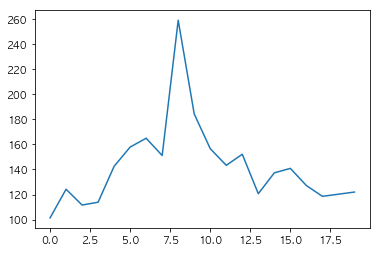

In [29]:
plt.plot(val_score)

In [30]:
np.sqrt(mean_absolute_error(y_test, y_pred2))

18.589657678234534

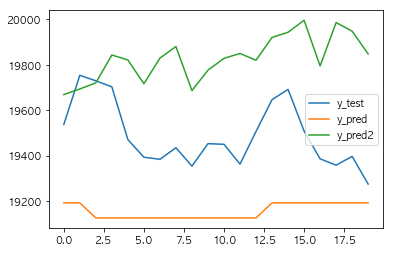

In [31]:
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.plot(y_pred2, label='y_pred2')
plt.legend()